# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [2]:
raisins_data = pd.read_excel('Raisin_Dataset.xlsx')
df = raisins_data.copy()

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [5]:
df.duplicated().sum() # No dublicates

0

In [6]:
df['Class'].value_counts() # Balanced data

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

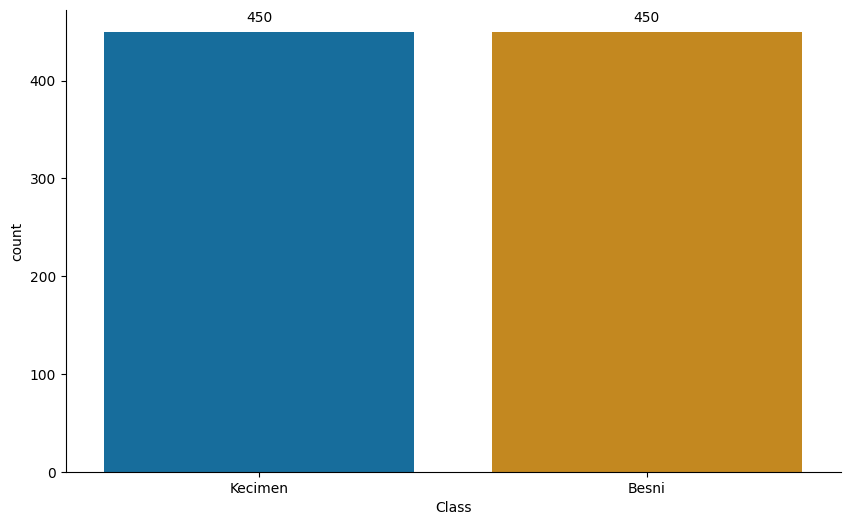

In [7]:
ax = sns.countplot(x = df["Class"], palette='colorblind')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show();

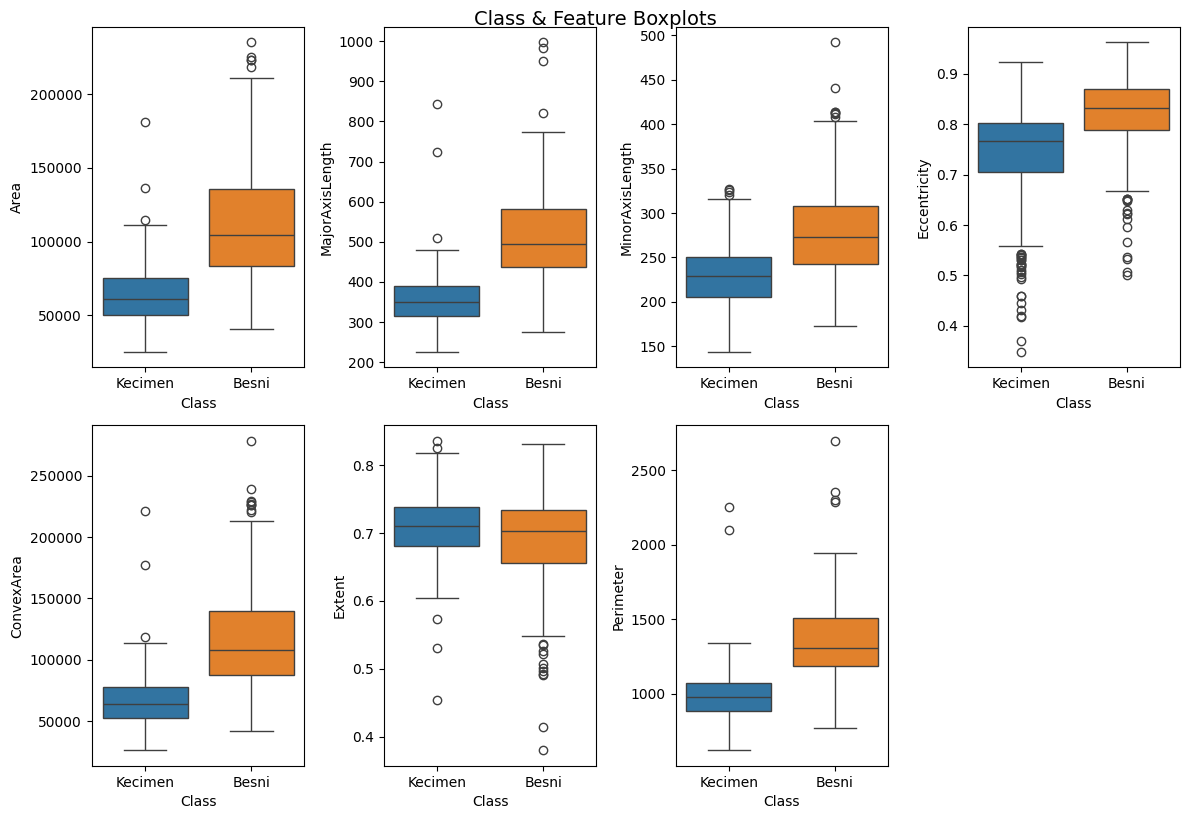

In [8]:
plt.figure(figsize=(12, 16))

# boxplot for each class-feaute pair
for i, col in enumerate(df.drop("Class", axis=1).columns):
    plt.subplot(4, 4, i+1) 
    sns.boxplot(x='Class', y=col, data=df, hue='Class', legend=False)

plt.suptitle('Class & Feature Boxplots', fontsize=14)
plt.tight_layout()
plt.show()

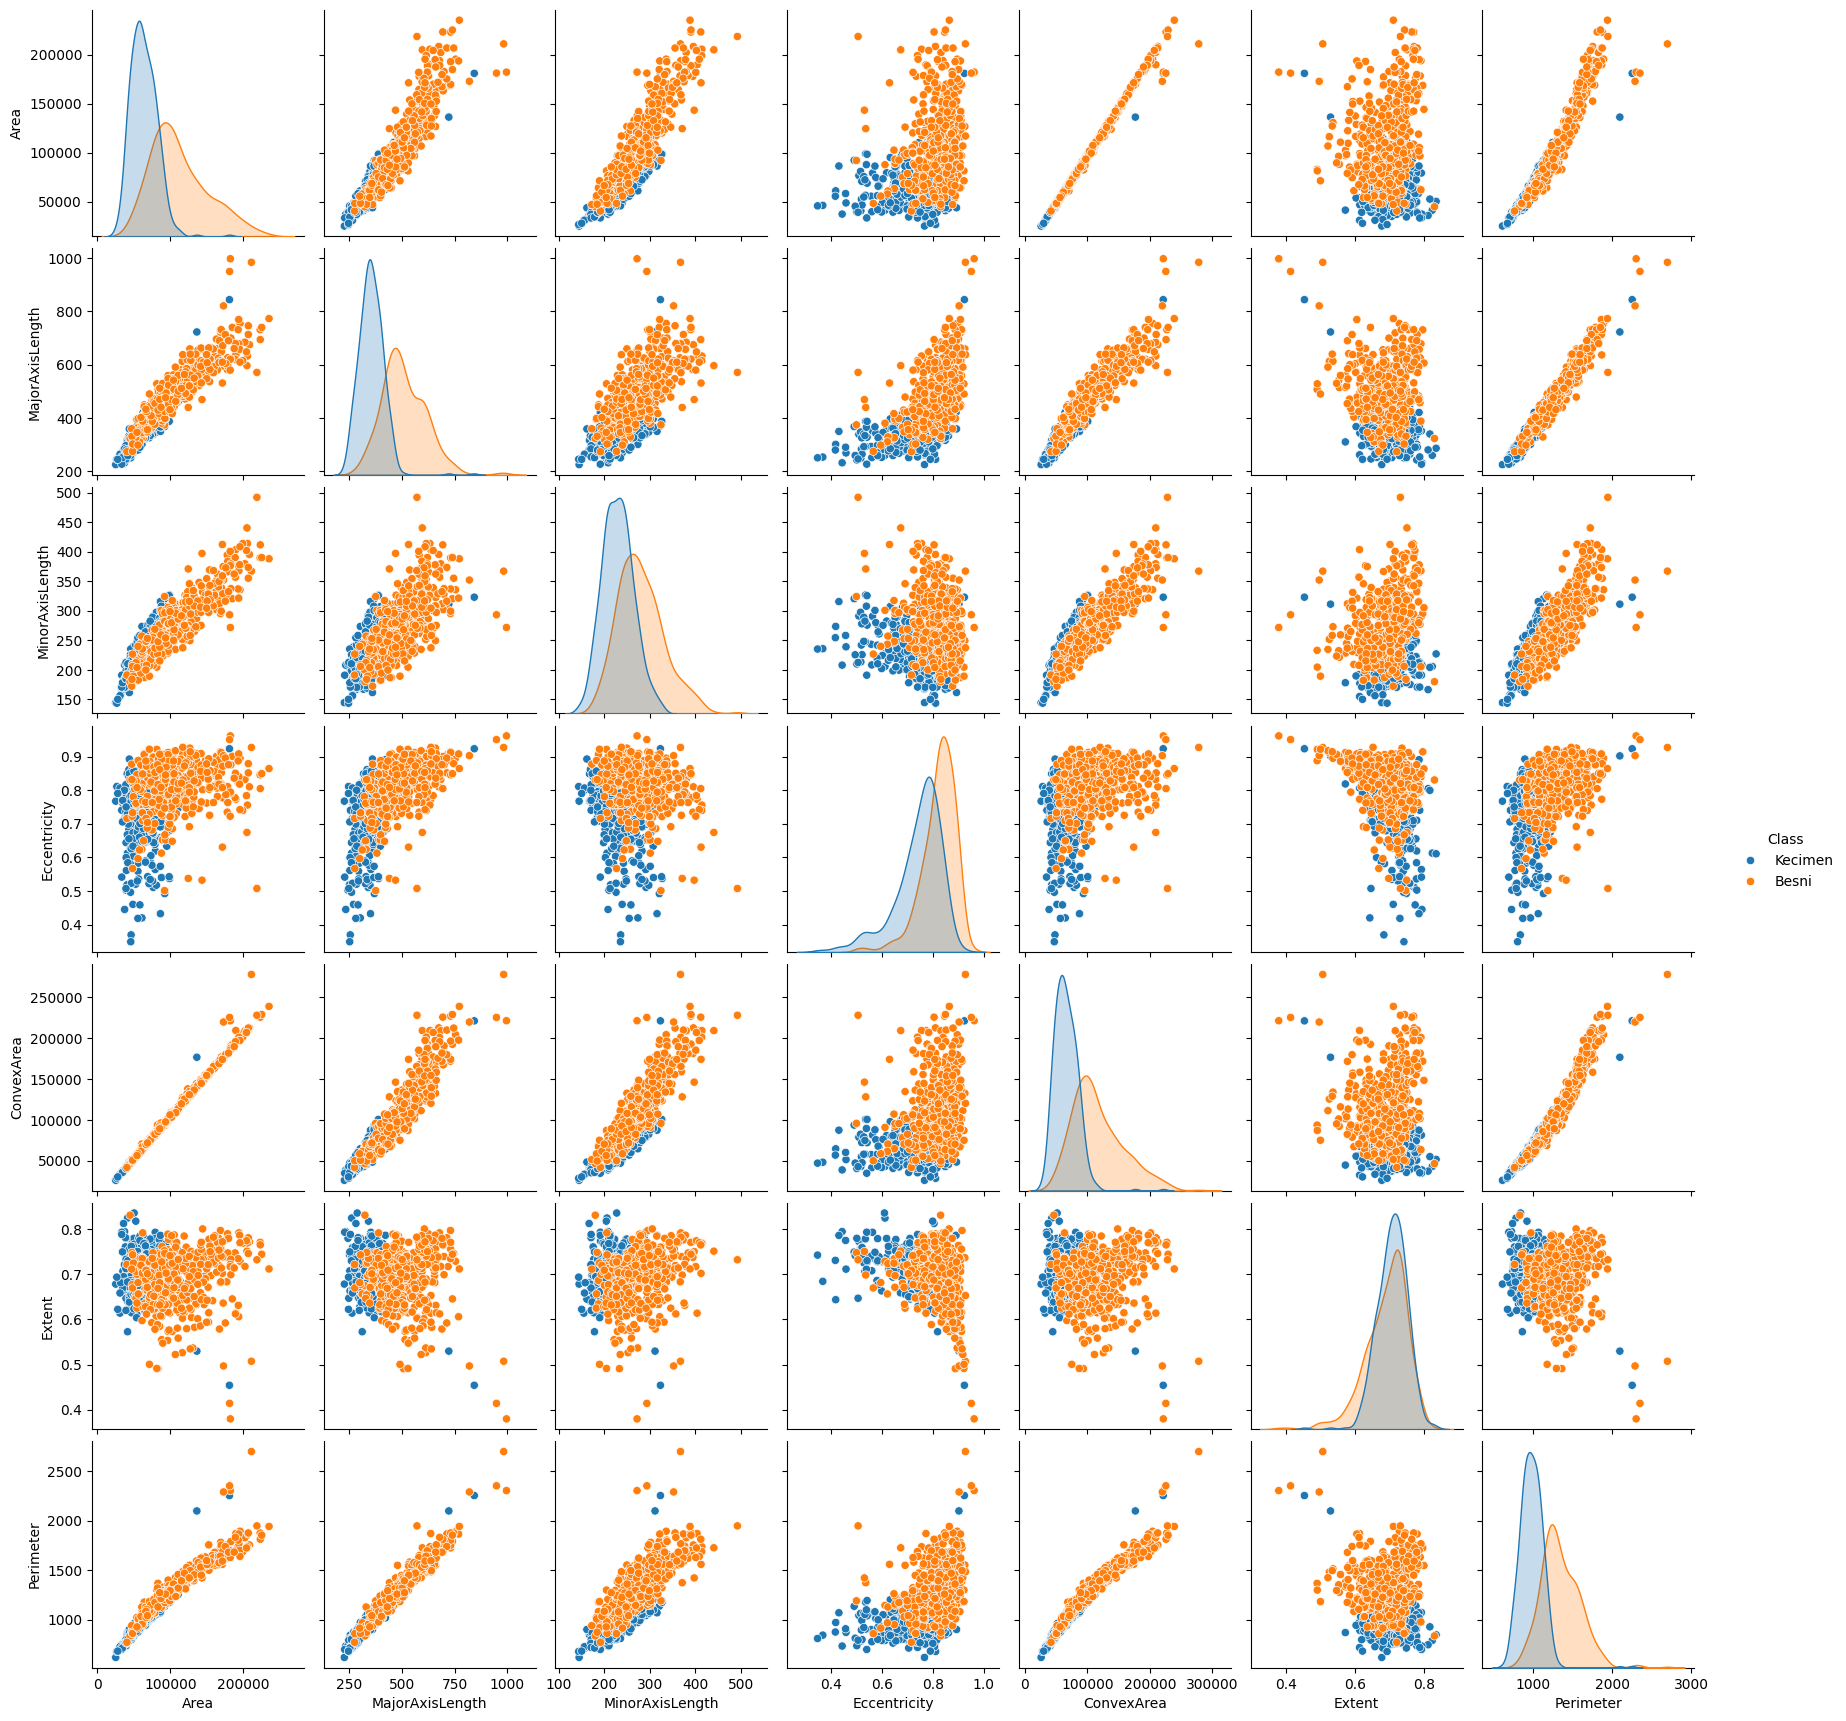

In [9]:
sns.pairplot(df, hue = "Class");

In [10]:
# Let's change categoric values in Class into numeric values.
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1})

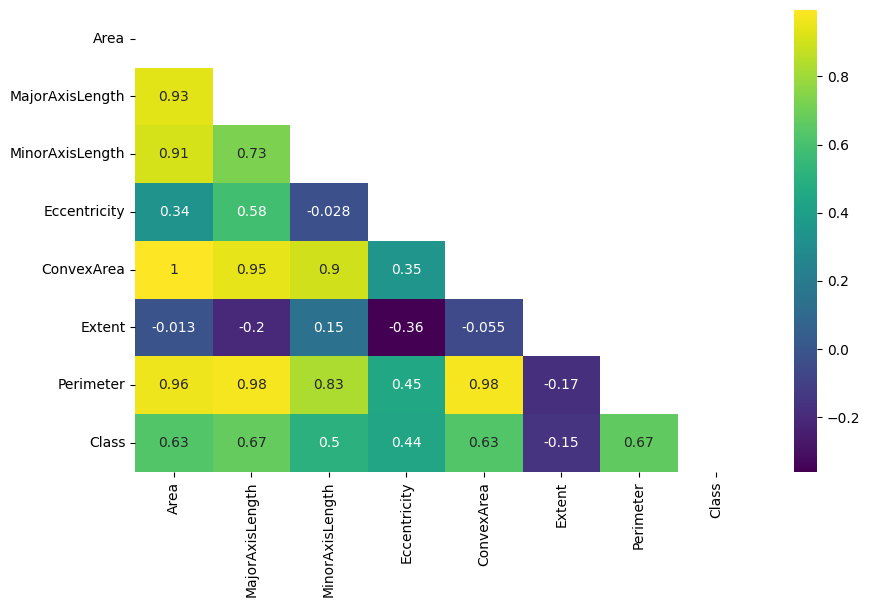

In [11]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot the heatmap with only the lower triangle shown
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='viridis')
plt.show();


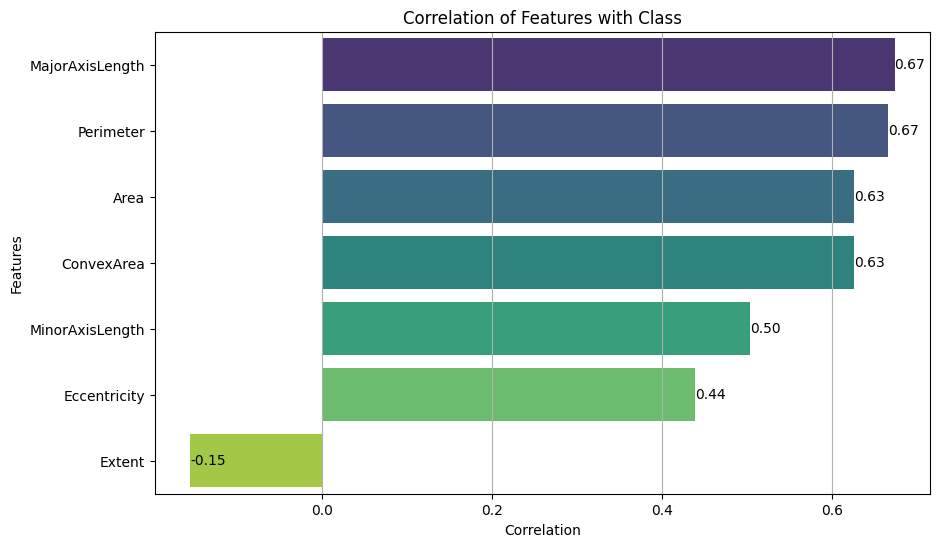

In [12]:
# Get the correlation values
correlation_values = df.corr()["Class"].drop("Class").sort_values(ascending=False)

# Plot the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_values.values, y=correlation_values.index, palette='viridis')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation of Features with Class')

# Add numeric values on the bars
for i, value in enumerate(correlation_values.values):
    plt.text(value, i, f'{value:.2f}', va='center', ha='left')

plt.grid(axis='x')
plt.show()

Dropping columns with high correlation.

In [13]:
df.drop(columns=['ConvexArea','Perimeter'], inplace=True);

## Train | Test Split and Scaling

In [16]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 101)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [26]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1] # brings prob based on class 1
test_data.sample(20)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Class,pred,pred_proba
210,49063,294.748,217.913,0.673,0.659,0,0,0.056
569,91146,498.392,241.897,0.874,0.673,1,1,0.861
209,49998,301.781,212.327,0.711,0.779,0,0,0.046
821,121077,521.191,302.109,0.815,0.735,1,1,0.934
77,42637,293.430,189.432,0.764,0.725,0,0,0.046
445,61200,323.174,246.288,0.647,0.707,0,0,0.090
185,43563,296.522,188.196,0.773,0.696,0,0,0.056
410,59654,350.900,219.490,0.780,0.713,0,0,0.165
804,223075,694.248,411.810,0.805,0.765,1,1,1.000
435,28216,245.401,150.246,0.791,0.622,0,0,0.025


## Model Performance

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [29]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[93  5]
 [12 70]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        98
           1       0.93      0.85      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[310  42]
 [ 61 307]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.83      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



Since data is balanced, I will check the accuracy score.

### Cross Validate

In [30]:
from sklearn.model_selection import cross_validate

In [31]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))

In [32]:
df_scores.mean()[2:]

test_precision   0.883
test_recall      0.834
test_f1          0.857
test_accuracy    0.858
dtype: float64

### GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
model = LogisticRegression(max_iter=100000)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10) 
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty": penalty,
             "C": C,
             "class_weight":class_weight,
             "solver": solver}

grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = "accuracy", 
                          n_jobs = -1);

In [35]:
grid_model.fit(X_train_scaled, y_train);

In [36]:
grid_model.best_params_

{'C': 0.46415888336127786,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [37]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[94  4]
 [13 69]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        98
           1       0.95      0.84      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.90       180


Train_Set
[[312  40]
 [ 61 307]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       352
           1       0.88      0.83      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [38]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

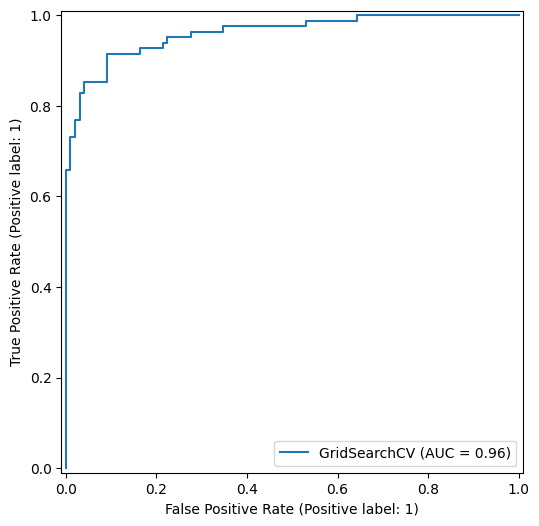

In [39]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test)

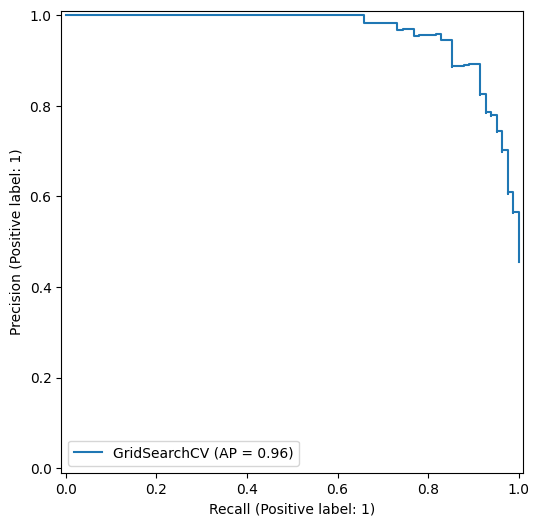

In [40]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test)

### Finding best threshold for accuracy

In [41]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:, 1])

0.9133985918972333

In [42]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:, 1])

In [43]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5098469384120611

In [44]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [45]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[94  4]
 [13 69]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        98
           1       0.95      0.84      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.90       180



# Final Model and Model Deployment

In [46]:
import pickle
pickle.dump(scaler, open('scaler_raisins2', 'wb'))

In [47]:
X_scaled = scaler.transform(X)

In [48]:
final_model = LogisticRegression(C = 0.46415888336127786, 
                                 class_weight = 'balanced', 
                                 penalty = 'l2',
                                 solver = 'lbfgs').fit(X_scaled, y)

In [49]:
pickle.dump(final_model, open('final_model_raisins2', 'wb'))